<a href="https://colab.research.google.com/github/LilasCorner/jlootbox-data/blob/main/JLootBoxData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns

In [ ]:
#creating and joining dataframes 

paramsdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/CombinedParams.csv",skip_blank_lines=True)
moneydf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/moneyCombined.csv",skip_blank_lines=True)
freqdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/purchaseCombined.csv",skip_blank_lines=True)
thresdf = pd.read_csv("https://raw.githubusercontent.com/LilasCorner/jlootbox-data/main/thresholdCombined.csv",skip_blank_lines=True)

mergedmoney = pd.merge(moneydf, paramsdf, how='outer', left_on="run", right_on="run")
mergedfreq = pd.merge(freqdf, paramsdf, how='outer', left_on="run", right_on="run")
mergedthres = pd.merge(thresdf, paramsdf, how='outer', left_on="run", right_on="run")

#for cases where data was corrupted, drop the rows
mergedmoney.dropna()
mergedfreq.dropna()
mergedthres.dropna()

print(mergedthres.head)

<bound method NDFrame.head of            run  getThreshold  tick  randomSeed  stopTime manip  numPlayers  \
0         12.0           5.0   1.0  25869613.0     500.0  NONE       169.0   
1         12.0           5.0   1.0  29083638.0     500.0  NONE       200.0   
2         12.0           5.0   1.0  25869613.0     500.0  NONE       169.0   
3         12.0           5.0   1.0  29083638.0     500.0  NONE       200.0   
4         12.0           5.0   1.0  25869613.0     500.0  NONE       169.0   
...        ...           ...   ...         ...       ...   ...         ...   
344550  3941.0           NaN   NaN  29104086.0     500.0  NONE       700.0   
344551  3941.0           NaN   NaN  29104086.0     500.0  NONE       700.0   
344552  5654.0           NaN   NaN  29121148.0     500.0  NONE       900.0   
344553  5654.0           NaN   NaN  29121148.0     500.0  NONE       900.0   
344554  5654.0           NaN   NaN  29121148.0     500.0  NONE       900.0   

        strat  network  
0       

(0.0, 5.0)

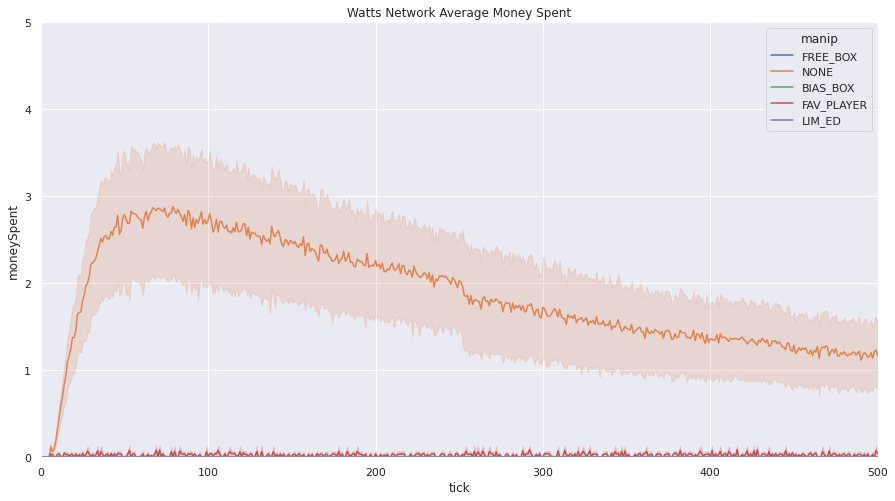

In [ ]:
#WATTS

wattmoney = mergedmoney[(mergedmoney['network'] == 'WATTS') & (mergedmoney['strat'] == 'PRICE')]
fig, ax = plt.subplots()


plt.title('Watts Network Average Money Spent')
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=wattmoney['tick'], y=wattmoney['moneySpent'], hue=wattmoney['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 5)

Text(0.5, 1.0, 'Watts Network Average Purchase Frequency')

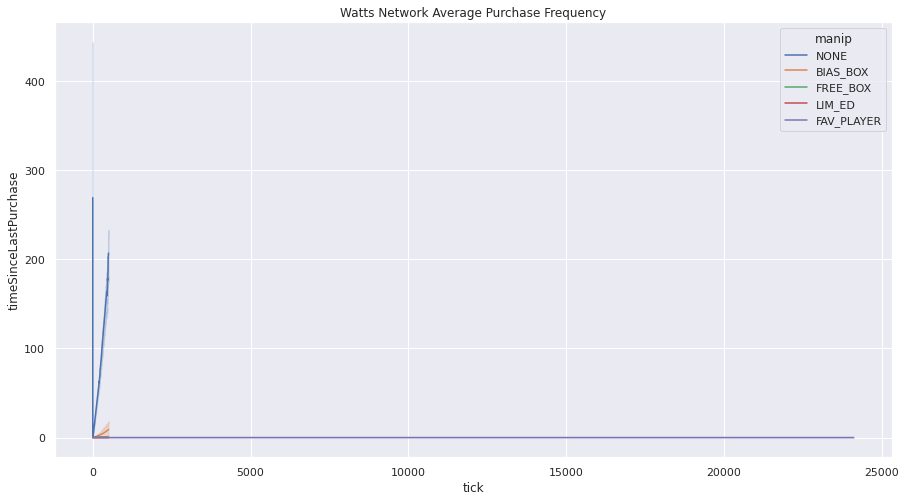

In [ ]:
#WATTS
wattfreq = mergedfreq[(mergedfreq['network'] == 'WATTS')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=mergedfreq['tick'], y=mergedfreq['timeSinceLastPurchase'], hue=mergedfreq['manip'], markers=True)


plt.title('Watts Network Average Purchase Frequency')

Text(0.5, 1.0, 'Watts Network Average Buy Threshold')

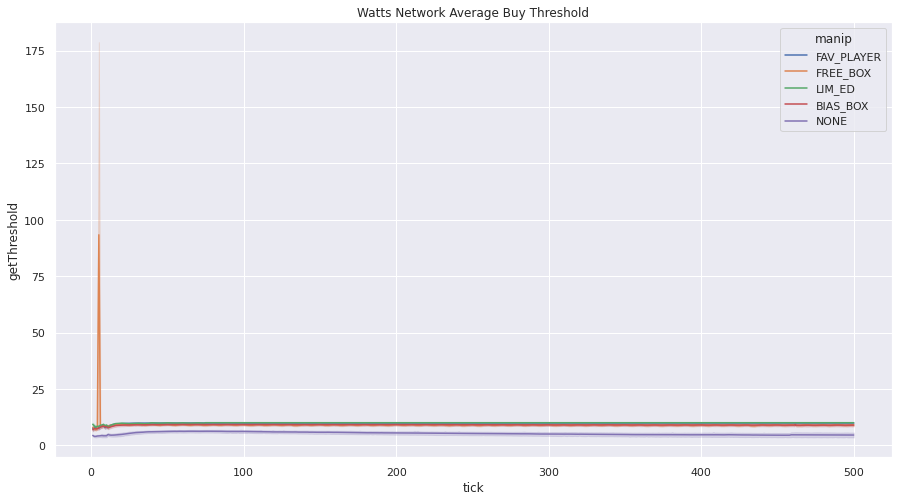

In [ ]:
#WATTS
wattthres = mergedthres[(mergedthres['network'] == 'WATTS')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=wattthres['tick'], y=wattthres['getThreshold'], hue=wattthres['manip'], markers=True)



plt.title('Watts Network Average Buy Threshold')

Text(0.5, 1.0, 'Random Density Network Average Money Spent')

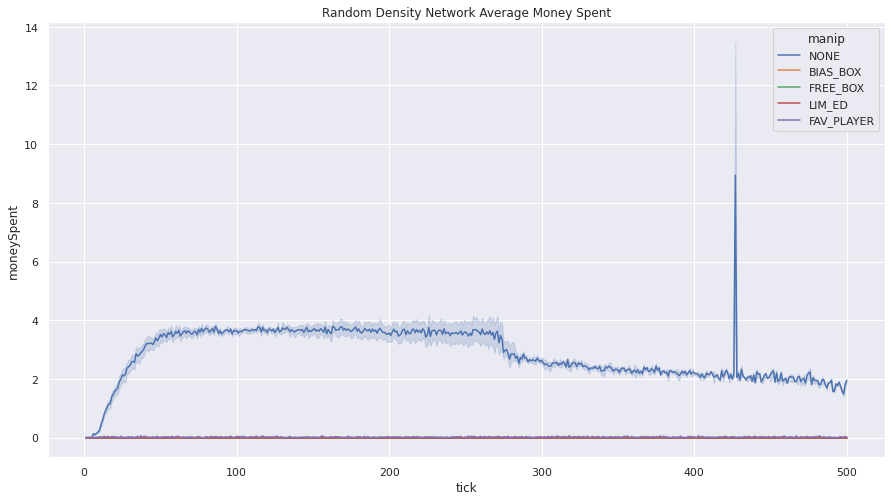

In [ ]:
#RANDOM
randommoney = mergedmoney[(mergedmoney['network'] == 'RANDOM') & (mergedmoney['strat'] == 'PRICE')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randommoney['tick'], y=randommoney['moneySpent'], hue=randommoney['manip'], markers=True)

plt.title('Random Density Network Average Money Spent')

Text(0.5, 1.0, 'Random Density Network Average Purchase Frequency')

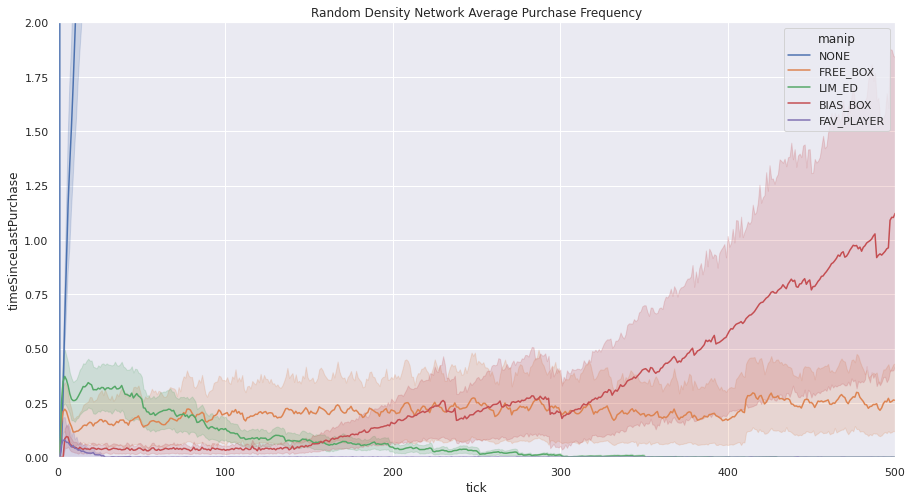

In [ ]:
#RANDOM
randomfreq = mergedfreq[(mergedfreq['network'] == 'RANDOM')]
fig, ax = plt.subplots()


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randomfreq['tick'], y=randomfreq['timeSinceLastPurchase'], hue=randomfreq['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 2)


plt.title('Random Density Network Average Purchase Frequency')

Text(0.5, 1.0, 'Random Density Network Average Buy Threshold')

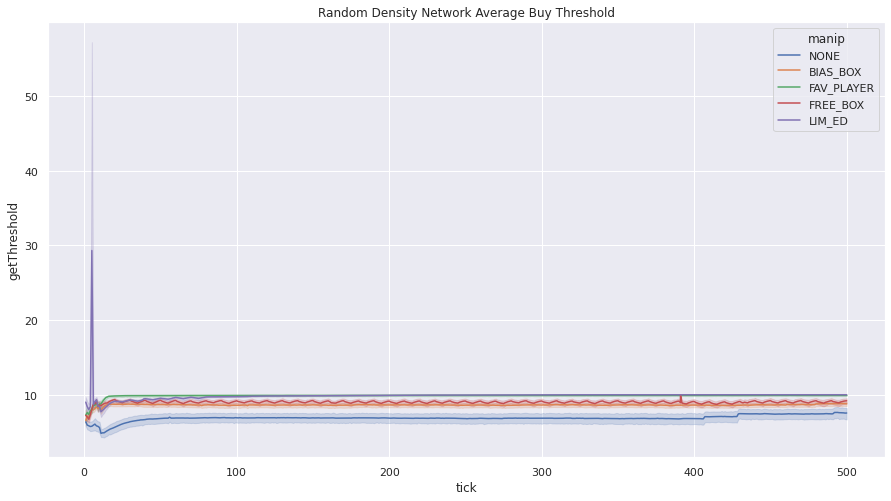

In [ ]:
#RANDOM

randomthres = mergedthres[(mergedthres['network'] == 'RANDOM')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=randomthres['tick'], y=randomthres['getThreshold'], hue=randomthres['manip'], markers=True)



plt.title('Random Density Network Average Buy Threshold')

Text(0.5, 1.0, 'Lattice Network Average Money Spent')

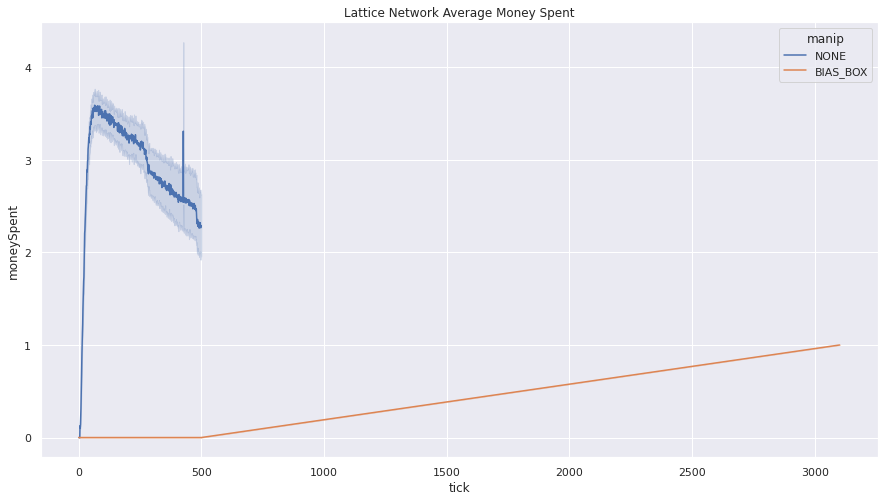

In [ ]:
#LATTICE
latticemoney = mergedmoney[(mergedmoney['network'] == 'LATTICE') & (mergedmoney['strat'] == 'PRICE')]


sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticemoney['tick'], y=latticemoney['moneySpent'], hue=latticemoney['manip'], markers=True)

plt.title('Lattice Network Average Money Spent')

Text(0.5, 1.0, 'Lattice Network Average Purchase Frequency')

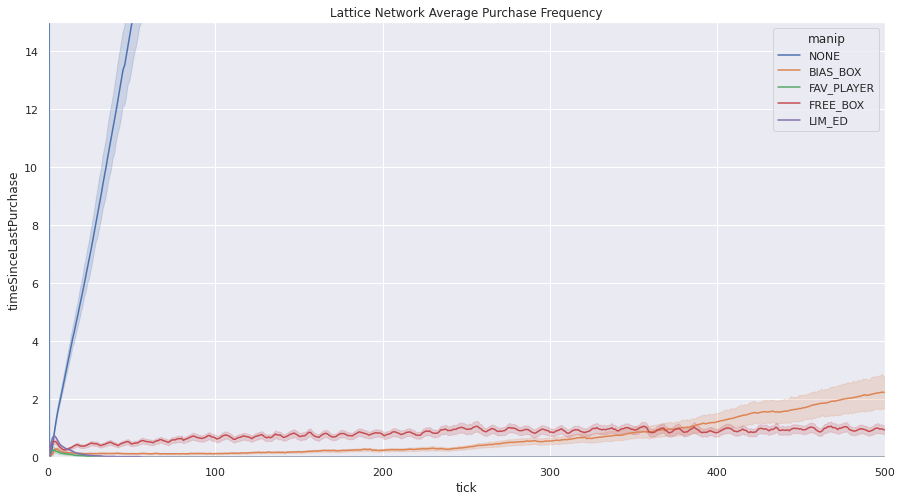

In [ ]:
#LATTICE
latticefreq = mergedfreq[(mergedfreq['network'] == 'LATTICE')]

fig, ax = plt.subplots()

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticefreq['tick'], y=latticefreq['timeSinceLastPurchase'], hue=latticefreq['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 15)

plt.title('Lattice Network Average Purchase Frequency')

Text(0.5, 1.0, 'Lattice Network Average Buy Threshold')

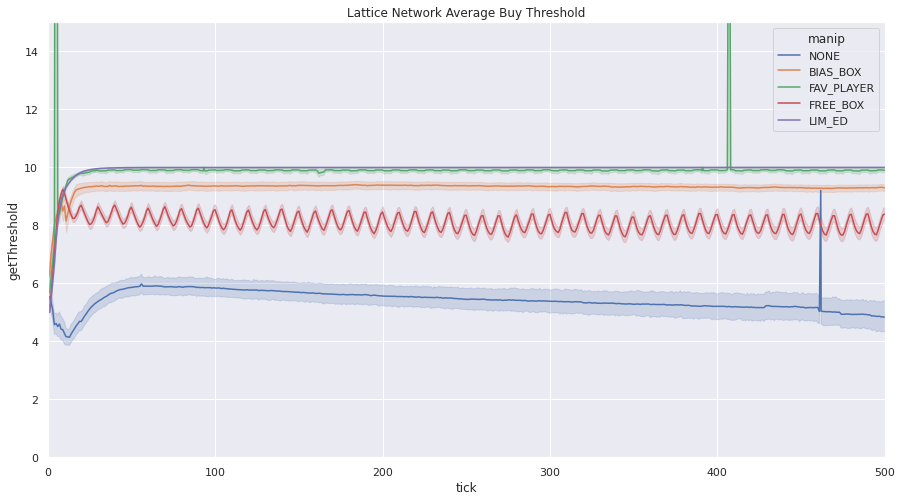

In [ ]:
#LATTICE


latticethres = mergedthres[(mergedthres['network'] == 'LATTICE')]

fig, ax = plt.subplots()

 
# change the limits of X-axis

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x=latticethres['tick'], y=latticethres['getThreshold'], hue=latticethres['manip'], markers=True, ax = ax)
ax.set_xlim(0, 500)
ax.set_ylim(0, 15)


plt.title('Lattice Network Average Buy Threshold')